<a href="https://colab.research.google.com/github/comHack/Mammography_DL_Classification/blob/master/Models/model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [3]:
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

import pickle

import os

import random

from google.colab import drive

# **Mounting Drive**

In [4]:
drive.mount('/gdrive')
os.symlink('/gdrive/My Drive', '/content/gdrive')

Mounted at /gdrive


# **Import Data**

## **Process data**
Create own data distribution (with own shuffle)

In [ ]:
# setting the path to the pickle files saved  (grayscale images)
benign_link = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/benign.pickle"

malign_link = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/malign.pickle"

In [ ]:
# opening pickle files (grayscale images)
pickle_in = open(benign_link, "rb")
benign_data = pickle.load(pickle_in)

pickle_in = open(malign_link, "rb")
malign_data = pickle.load(pickle_in)

In [ ]:
# shuffle the data
random.shuffle(benign_data)
random.shuffle(malign_data)

In [ ]:
# splitting and merging the data from benign and malign arrays

# split eg. train_per = 0.7 --> 70% train data, 30% test data
train_per = 0.7

trn_b = int(len(benign_data) * train_per)

trn_m = int(len(malign_data) * train_per)

train_data = benign_data[: trn_b].copy() + malign_data[: trn_m].copy()

test_data = benign_data[trn_b :].copy() + malign_data[trn_m :].copy()

In [ ]:
# shuffle train and test data
random.shuffle(train_data)
random.shuffle(test_data)

In [ ]:
assert len(train_data + test_data) == len(benign_data + malign_data)

In [ ]:
# separating the features and labels

X_train = []
y_train = []

X_test = []
y_test = []

for X, y in train_data:
  X_train.append(X)
  y_train.append(y)

for X, y in test_data:
  X_test.append(X)
  y_test.append(y)


In [ ]:
# reshaping 

num_channels = 1 # depend whether you're using rgb or grayscale images

IMG_SIZE = len(X_train[0])

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, num_channels)

y_train = np.array(y_train).reshape(-1)

IMG_SIZE = len(X_test[0])

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, num_channels)

y_test = np.array(y_test).reshape(-1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

**Scaling**

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

## **Import processed data**
Use the same data distribution

In [5]:
# setting the path to the pickle files saved  (grayscale images)
X_train_link = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/X_train.pickle"

y_train_link = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/y_train.pickle"

X_test_link = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/X_test.pickle"

y_test_link = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/y_test.pickle"

In [6]:
pickle_in = open(X_train_link, "rb")
X_train = pickle.load(pickle_in)

pickle_in = open(y_train_link, "rb")
y_train = pickle.load(pickle_in)

pickle_in = open(X_test_link, "rb")
X_test = pickle.load(pickle_in)

pickle_in = open(y_test_link, "rb")
y_test = pickle.load(pickle_in)

# **Setting up models**

In [7]:
num_channels = 1

### **model**

In [8]:
model = tf.keras.models.Sequential(
    [
     
     Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(32, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(512, activation='relu'),

     Dropout(0.5),

     Dense(1, activation='sigmoid')
     
    ]
)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               10240512  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0

In [10]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [11]:
result = model.fit(
    x = X_train,
    y = y_train,
    batch_size = 32,
    epochs = 100,
    validation_split = 0.3,
    verbose = 2
)

Epoch 1/100
62/62 - 1s - loss: 0.6443 - acc: 0.6795 - val_loss: 0.5714 - val_acc: 0.7005
Epoch 2/100
62/62 - 0s - loss: 0.4965 - acc: 0.7885 - val_loss: 0.4836 - val_acc: 0.7852
Epoch 3/100
62/62 - 1s - loss: 0.4512 - acc: 0.8116 - val_loss: 0.4476 - val_acc: 0.8115
Epoch 4/100
62/62 - 0s - loss: 0.4304 - acc: 0.8198 - val_loss: 0.4502 - val_acc: 0.8055
Epoch 5/100
62/62 - 0s - loss: 0.3976 - acc: 0.8331 - val_loss: 0.4234 - val_acc: 0.8174
Epoch 6/100
62/62 - 0s - loss: 0.3504 - acc: 0.8438 - val_loss: 0.4090 - val_acc: 0.8234
Epoch 7/100
62/62 - 0s - loss: 0.3343 - acc: 0.8495 - val_loss: 0.4042 - val_acc: 0.8150
Epoch 8/100
62/62 - 0s - loss: 0.3047 - acc: 0.8679 - val_loss: 0.4714 - val_acc: 0.8246
Epoch 9/100
62/62 - 0s - loss: 0.2892 - acc: 0.8715 - val_loss: 0.4117 - val_acc: 0.8210
Epoch 10/100
62/62 - 0s - loss: 0.3162 - acc: 0.8638 - val_loss: 0.4114 - val_acc: 0.8091
Epoch 11/100
62/62 - 0s - loss: 0.2684 - acc: 0.8822 - val_loss: 0.4138 - val_acc: 0.8222
Epoch 12/100
62/62 

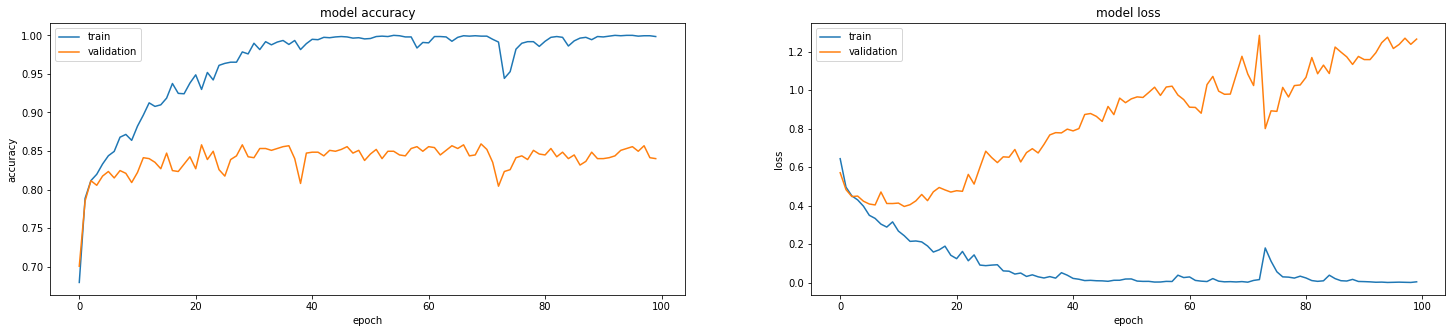

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (25, 5))

ax[0].plot(result.history['acc'])
ax[0].plot(result.history['val_acc'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'validation'], loc='upper left')

ax[1].plot(result.history['loss'])
ax[1].plot(result.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'validation'], loc='upper left')

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


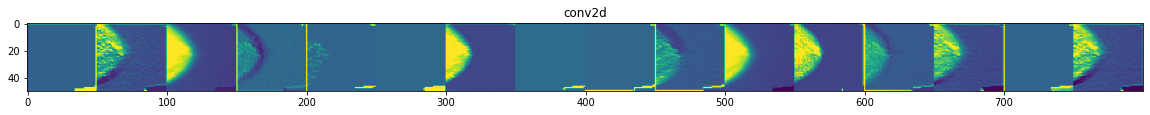

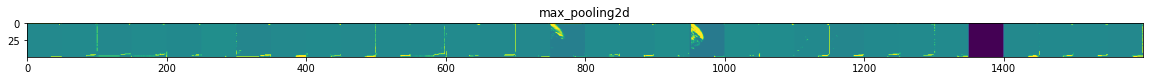

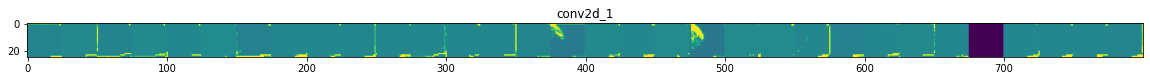

In [13]:
outputs = [layer.output for layer in model.layers[1:]]

model_vis = tf.keras.models.Model(inputs = model.input, outputs = outputs)

x = random.choice(X_test)
x   = x.reshape((1,) + x.shape)

feature_maps = model_vis.predict(x)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, feature_maps):
  
  if len(feature_map.shape) == 4:
    
    n_features = feature_map.shape[-1]
    size       = feature_map.shape[ 1]
    
    display_grid = np.zeros((size, size * n_features))
    
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )